 # Lab 7


## Problem 1

Neural networks are trained and tested with different datasets to make sure that the networks can actually deal with new data and not just data it has already seen. If the label of a tested image corresponds to the largest entry of the output vector, the image has been correctly classified by the network. The fraction of
correctly classified test images is a measure for the network’s performance.


a) Download the MNIST npy files provided in the shared folder. They contain the MNIST test and the training datasets alongside their labels. Load them into a notebook.

In [1]:
import numpy as np

path = '/mnt/share/nnds/mnist/'

trainData = np.load(path+'mnistDataTrain.npy')
trainLabels = np.load(path+'mnistLabelsTrain.npy')

testData = np.load(path+'mnistDataTest.npy')
testLabels = np.load(path+'mnistLabelsTest.npy')


(10000, 28, 28)
<class 'numpy.int32'>


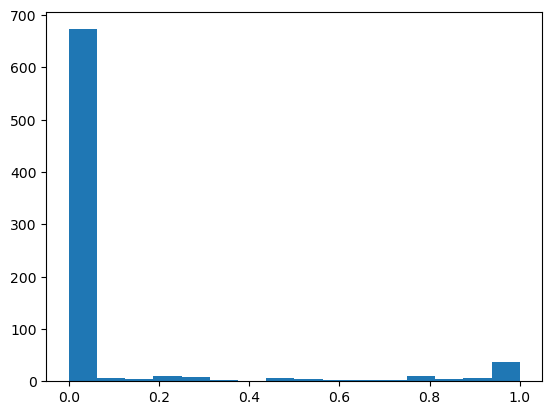

In [2]:
import matplotlib.pyplot as plt

print(np.shape(testData))
# print(testData[0])
plt.hist(testData[0].flatten(),16)
print(type(trainLabels[0]))

b) Create a network with 784 input nodes, 100 hidden nodes, 10 output nodes and a learning rate of 0.6. Train the network with all 60000 images of the dataTrain dataset.

In [3]:
from network import neuralNetwork

In [4]:
iNodes = 784
hNodes = 100
oNodes = 10
lRate = 0.6

my_network = neuralNetwork(iNodes, hNodes, oNodes, lRate)

# train step:
for i, label in enumerate(trainLabels):
    # create target vector
    target = np.zeros(10, dtype='float') + 0.01 # Set the target vector
    target[label] = 0.99

    # feed image with target vector into method `train`
    my_network.train(trainData[i], target)

print(i)

59999


c) Write a function or a method `evaluate` that determines the fraction of `dataTest` images that the network classifies correctly. What is the performance of your network? Hint: `np.argmax(arr)` returns the index of the largest element of `arr` ...


In the module  `network.py`:

```python
def evaluate(self, test_data, test_labels):
    num_correct_predictions = 0

    for i, test_label in enumerate(test_labels):
        prediction = self.query(test_data[i])  # query the network

        # Compare index of the largest element in `prediction` with label
        if test_label == np.argmax(prediction):
            num_correct_predictions += 1

    performance = num_correct_predictions / len(test_labels)
    return performance
```



In [5]:
performance = my_network.evaluate(testData, testLabels)
print('Performance: ' + str(performance))

Performance: 0.9109


d) Use plt.imshow (see session 6) to plot the weight matrices of the trained network. What has changed compared to the untrained state?

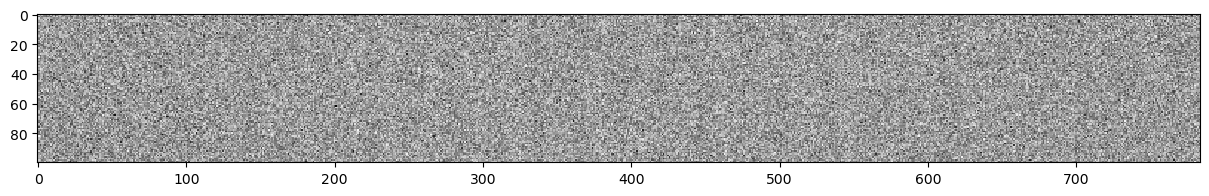

(100, 784)


In [6]:
plt.figure(figsize=(15,15))
wihImg = my_network.wih
plt.imshow(wihImg, cmap='Greys', interpolation='None')
plt.show()
print(np.shape(wihImg))

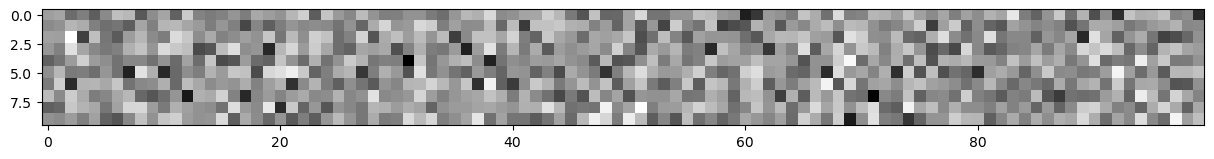

(10, 100)


In [7]:
plt.figure(figsize=(15,15))
whoImg = my_network.who
plt.imshow(whoImg, cmap='Greys', interpolation='None')
plt.show()
print(np.shape(whoImg))

## Problem 2

Training large neural network can be a very long process. Therefore, we need a method to permanently save
and restore a network’s memory.

a) Write a method `saveWeights` that saves the matrices wih and who to the disk. Use
```
np.save(filename , array)
```
and the file name extension `*.npy` (e.g. filename = "wih.npy") to create binary files.


In the module  `network.py`:
```python
def saveWeights(self, base_path):
    wih_filename = 'wih.npy'
    who_filename = 'who.npy'
    np.save(base_path + wih_filename,self.wih)
    np.save(base_path + who_filename,self.who)
```

In [8]:
my_network.saveWeights('/home/nnds1b/lab/lab_7/weights/')

b) Add a method `restoreWeights` that restores the network’s memory. Use

```array = np.load(filename)```

to read binary files.


In the module  `network.py`:
```python
    def restoreWeights(self, weights_path):
        wih_filename = 'wih.npy'
        who_filename = 'who.npy'
        self.wih = np.load(weights_path+wih_filename)
        self.who = np.load(weights_path+who_filename)
```

c) Create an instance of the network `testNet`. Train it, save the network’s weights, set them to 0 and restore them again. Verify that your network is able to classify handwritten numbers again.

In [9]:
my_network.wih = 0
my_network.who = 0

performance = my_network.evaluate(testData, testLabels)
print('Performance untrained network: ' + str(performance))

Performance untrained network: 0.098


In [10]:
my_network.restoreWeights('/home/nnds1b/lab/lab_7/weights/')

performance = my_network.evaluate(testData, testLabels)
print('Performance trained network: ' + str(performance))

Performance trained network: 0.9109


## Problem 3

This task is intended for those of you who would like to go an extra mile ... With every training image fed through the network, the weight matrices slightly change.

a) Write a `plotWeights(self, filename)` method takes a filename and quietly saves the image to a file.

b) Create a network with 784 input nodes, 100 hidden nodes, 10 output nodes and a learning rate of 0.3. Train the network with all 60000 images of the train dataset by iterating through the array and calling the train method for every image. After every 600th iteration, call your `plotWeights` method.
Chose a reasonable name for your image files.

c) Create a gif animation from your image files.